In [1]:
!pip install pythainlp
!pip install full
!pip install emoji
!pip install attacut
import pandas as pd
import numpy as np

In [2]:
df_fake = pd.read_csv('/home/jovyan/work/data/Fake2.csv',encoding='utf-8')
df_fake

,title,body,type,W/D/Y,url,main url
0,นายทักษิณขยับ เรือนจำผวา,[นายทักษิณขยับเรือนจำผวา]\n.\nสื่อหลายสำนักพาด...,การเมือง,28/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com
1,“พล.ต.อ.เสรีพิศุทธ์” ฟันธง “บิ๊กโจ๊ก” ชนะปมออก...,"""พล.ต.อ.เสรีพิศุทธ์"" ฟันธง ""บิ๊กโจ๊ก"" ชนะปมออก...",การเมือง,28/04/67,https://www.topnews.co.th/news/953843?fbclid=I...,https://www.topnews.co.th
2,ขาดทุนยับประกาศปิดกิจการโละพนักงานทิ้ง,ได้ยินข่าวช่องว้ายทีวี ซึ่งมีทายาทของมหาเศรษฐี...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com
3,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com
4,ก็เลือกมันมาแล้วเนาะ ทำไงได้ล่ะ ก้มหน้าก้มตาให...,เพื่อไทยเป็นรัฐบาล ค่าไฟ ค่าน้ำมัน ค่าแกส ลดทั...,การเมือง,26/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com
...,...,...,...,...,...,...
995,กรมการขนส่งทางบก เตือน!!! ประชาชนอย่าหลงเชื่อเ...,กรมการขนส่งทางบก เตือน!!! ประชาชนอย่าหลงเชื่อเ...,ทั่วไป,25/12/66,https://www.dlt.go.th/th/public-news/3475/?emb...,https://www.dlt.go.th
996,ศาลฯ ประสานสหรัฐฯ ขอข้อมูลคดีรับสินบนโตโยต้า,เลขาธิการสำนักงานศาลยุติธรรม เผยเร่งตรวจสอบข้อ...,การเมือง,04/06/64,https://www.thaipbs.or.th/news/content/304933,https://www.thaipbs.or.th
997,นวัตกรรมแผ่นแปะ Keep On Sleep ช่วยให้นอนหลับอย...,นวัตกรรมแผ่นแปะ Keep On Sleep ซึ่งพัฒนาโดย Eng...,สุขภาพ,01/05/67,https://www.chula.ac.th/news/157476/,https://www.chula.ac.th
998,ธนาคารออมสิน เติมสภาพคล่องผู้ประกอบการ SMEs จั...,กรณีการพบเพจเฟซบุ๊กที่ใช้ชื่อว่า สินเชื่อธุรกิ...,เศรษฐกิจ,19/01/63,https://www.gsb.or.th/news/%E0%B8%98%E0%B8%99%...,https://www.gsb.or.th


In [3]:
df_real = pd.read_csv('/home/jovyan/work/data/Real2.csv',encoding='utf-8')
df_real

,title,body,type,W/D/Y,url,main url
0,กมธ. ถกร่าง พ.ร.บ.สมรสเท่าเทียม โค้งสุดท้าย\n ...,“รัดเกล้า” แจง กมธ.ประชุมกลั่นกรองร่าง พ.ร.บ.ส...,การเมือง,14/03/67,https://www.thairath.co.th/news/politic/2770315,https://www.thairath.co.th
1,"คืบหน้าแก้หนี้นอกระบบ ไกล่เกลี่ยสำเร็จ 21,249\...",ปลัดมหาดไทย เผยคืบหน้าการแก้ปัญหาหนี้นอกระบบ ล...,การเมือง,13/03/67,https://www.thairath.co.th/news/politic/2770309,https://www.thairath.co.th
2,สปสช. อนุมัติหนุนท้องถิ่น ใช้งบ กปท. จัดรถรับส...,บอร์ด สปสช. ไฟเขียวแนวทางจัดบริการ “พาหนะรับส่...,การเมือง,26/08/67,https://www.facebook.com/AntiFakeNewsCenter/ph...,https://www.facebook.com
3,อภิสิทธิ์ ไม่หวั่นสุเทพตั้งพรรคหนุนประยุทธ์\n ...,จะไม่เป็นนักการเมืองอีกแล้ว21 ก.พ.2561 จากกรณี...,การเมือง,24/02/63,https://prachatai.com/journal/2018/02/75549,https://prachatai.com
4,2 ป. “แยกกันเดิน” แต่ถูกจับ “ตีรวมกัน”,เปิดศักราชปี 2566 ด้วยการประกาศ “แยกทาง-แยกพรร...,การเมือง,14/05/66,https://www.bbc.com/thai/articles/cye6kzljz8go,https://www.bbc.com
...,...,...,...,...,...,...
8995,ช่องทางประกาศผลสอบ O-NET ป.6 และ ม.3 ปีการศึกษ...,เช็กช่องทางประกาศผลสอบ O-NET ป.6 และ ม.3 ปีการ...,การศึกษา,28/03/67,https://www.thairath.co.th/news/society/2774081,https://www.thairath.co.th
8996,ขรก.เฮ! ครม.เคาะขึ้นเงินเดือน ปรับฐานเริ่มต้นท...,ครม.เห็นชอบปรับเพิ่มเงินเดือนข้าราชการบรรจุใหม...,การศึกษา,28/11/66,https://mgronline.com/politics/detail/96600001...,https://mgronline.com
8997,สพฐ. แจงเลือกวิธีเรียนได้หลายแบบหากไม่พร้อมเรี...,นายอัมพร พินะสา เลขาธิการคณะกรรมการการศึกษาขั้...,การศึกษา,28/01/64,https://www.obec.go.th/archives/377135,https://www.obec.go.th
8998,"กยศ.ประกาศรายชื่อสถานศึกษา 4,184 แห่ง ที่เข้าร...",กองทุนเงินให้กู้ยืมเพื่อการศึกษา (กยศ.) ประกา...,การศึกษา,28/03/67,https://www.studentloan.or.th/th/news/1711620935,https://www.studentloan.or.th


In [4]:
df_fake["class"] = 0
df_real["class"] = 1

In [5]:
df_fake.shape, df_real.shape

((1000, 7), (9000, 7))

In [6]:
df_fake_manual_testing = df_fake.tail(500)
for i in range(999,499,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_real.tail(2500)
for i in range(8999,6499,-1):
    df_real.drop([i], axis = 0, inplace = True)

In [7]:
df_fake_manual_testing.shape

(500, 7)

In [8]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("csv/manual_testing.csv")

In [9]:
df_manual_testing.shape

(3000, 8)

In [10]:
df = pd.concat([df_fake, df_real], axis =0 )
df

,title,body,type,W/D/Y,url,main url,class,main url
0,นายทักษิณขยับ เรือนจำผวา,[นายทักษิณขยับเรือนจำผวา]\n.\nสื่อหลายสำนักพาด...,การเมือง,28/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN
1,“พล.ต.อ.เสรีพิศุทธ์” ฟันธง “บิ๊กโจ๊ก” ชนะปมออก...,"""พล.ต.อ.เสรีพิศุทธ์"" ฟันธง ""บิ๊กโจ๊ก"" ชนะปมออก...",การเมือง,28/04/67,https://www.topnews.co.th/news/953843?fbclid=I...,https://www.topnews.co.th,0,NaN
2,ขาดทุนยับประกาศปิดกิจการโละพนักงานทิ้ง,ได้ยินข่าวช่องว้ายทีวี ซึ่งมีทายาทของมหาเศรษฐี...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN
3,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN
4,ก็เลือกมันมาแล้วเนาะ ทำไงได้ล่ะ ก้มหน้าก้มตาให...,เพื่อไทยเป็นรัฐบาล ค่าไฟ ค่าน้ำมัน ค่าแกส ลดทั...,การเมือง,26/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN
...,...,...,...,...,...,...,...,...
6495,ตกงานฟ้าผ่า! พนักงาน 100 คนร่ำไห้ รง.รองเท้าไฟ...,ประกาศเลิกจ้าง! พนักงาน 100 คนถูกลอยแพ เจ้าของ...,ทั่วไป,20/10/64,https://www.thaipbs.or.th/news/content/308831,NaN,1,https://www.thaipbs.or.th/home
6496,ตรีนุชเปิดตัวแอป “ช่างอาชีวะ” บริการซ่อมเครื่อ...,ตรีนุชเปิดตัวแอปพลิเคชั่น “ช่างอาชีวะ” นำทีมช่...,ทั่วไป,20/10/64,https://www.prachachat.net/education/news-785721,NaN,1,https://www.prachachat.net/
6497,วัคซีนโควิด-19 เด็ก: ฉีดไฟเซอร์ให้นักเรียนทั่ว...,การฉีดวัคซีนต้านโควิด-19 ในกลุ่มเด็กนักเรียนอา...,ทั่วไป,04/10/64,https://www.bbc.com/thai/thailand-58784395,NaN,1,https://www.bbc.com/thai
6498,ทนพิษโควิดไม่ไหว ประสบปัญหาภสภาพคล่อง 'รร.อำนว...,20ต.ค.64-ผู้สื่อข่าวรายงานว่า เมื่อวันที่ 15 ต...,ทั่วไป,20/10/64,https://www.thaipost.net/main/detail/120323,NaN,1,https://www.thaipost.net/


In [11]:
df.shape

(7000, 8)

In [12]:
df.to_csv('csv/datadf.csv', index=False, encoding='utf-8-sig')
df

,title,body,type,W/D/Y,url,main url,class,main url
0,นายทักษิณขยับ เรือนจำผวา,[นายทักษิณขยับเรือนจำผวา]\n.\nสื่อหลายสำนักพาด...,การเมือง,28/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN
1,“พล.ต.อ.เสรีพิศุทธ์” ฟันธง “บิ๊กโจ๊ก” ชนะปมออก...,"""พล.ต.อ.เสรีพิศุทธ์"" ฟันธง ""บิ๊กโจ๊ก"" ชนะปมออก...",การเมือง,28/04/67,https://www.topnews.co.th/news/953843?fbclid=I...,https://www.topnews.co.th,0,NaN
2,ขาดทุนยับประกาศปิดกิจการโละพนักงานทิ้ง,ได้ยินข่าวช่องว้ายทีวี ซึ่งมีทายาทของมหาเศรษฐี...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN
3,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN
4,ก็เลือกมันมาแล้วเนาะ ทำไงได้ล่ะ ก้มหน้าก้มตาให...,เพื่อไทยเป็นรัฐบาล ค่าไฟ ค่าน้ำมัน ค่าแกส ลดทั...,การเมือง,26/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN
...,...,...,...,...,...,...,...,...
6495,ตกงานฟ้าผ่า! พนักงาน 100 คนร่ำไห้ รง.รองเท้าไฟ...,ประกาศเลิกจ้าง! พนักงาน 100 คนถูกลอยแพ เจ้าของ...,ทั่วไป,20/10/64,https://www.thaipbs.or.th/news/content/308831,NaN,1,https://www.thaipbs.or.th/home
6496,ตรีนุชเปิดตัวแอป “ช่างอาชีวะ” บริการซ่อมเครื่อ...,ตรีนุชเปิดตัวแอปพลิเคชั่น “ช่างอาชีวะ” นำทีมช่...,ทั่วไป,20/10/64,https://www.prachachat.net/education/news-785721,NaN,1,https://www.prachachat.net/
6497,วัคซีนโควิด-19 เด็ก: ฉีดไฟเซอร์ให้นักเรียนทั่ว...,การฉีดวัคซีนต้านโควิด-19 ในกลุ่มเด็กนักเรียนอา...,ทั่วไป,04/10/64,https://www.bbc.com/thai/thailand-58784395,NaN,1,https://www.bbc.com/thai
6498,ทนพิษโควิดไม่ไหว ประสบปัญหาภสภาพคล่อง 'รร.อำนว...,20ต.ค.64-ผู้สื่อข่าวรายงานว่า เมื่อวันที่ 15 ต...,ทั่วไป,20/10/64,https://www.thaipost.net/main/detail/120323,NaN,1,https://www.thaipost.net/


In [13]:
import pythainlp
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
import re
import string
from pythainlp.util import normalize
from pythainlp.tokenize import newmm

In [14]:
def cleanText(sentences):
    text = []
    temp = []
    for txt in sentences:
        # แปลงเป็น string
        t = str(txt)

        # ลบตัวอักษรที่ไม่ใช่ภาษาไทย
        cleaned_text = re.sub('[^ก-๙]', '', t)

        # Normalize ข้อความ
        normalized_text = normalize(cleaned_text)

        # ดึง stopwords ภาษาไทย
        stop_words = list(thai_stopwords())

        # ตัดคำ
        words = word_tokenize(normalized_text, engine="newmm")

        # ลบ stopwords และคำที่มีช่องว่าง
        filtered_words = [word for word in words if word not in stop_words and " " not in word]

        # แปลงเป็น lowercase และรวมคำ
        cleaned_sentence = " ".join(filtered_words).lower()

        # เก็บผลลัพธ์
        text.append(cleaned_sentence)
        temp.append([word.lower() for word in words])
        

    return text, temp


In [15]:
l = df.body

In [16]:
cleaned_word , temp = cleanText(l)

In [17]:
len(cleaned_word)

7000

In [18]:
df['clean_text'], tokenized_sentences = cleanText(df['body'])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['class'], test_size=0.2, random_state=42)

In [21]:
!pip install tensorflow
!pip install keras

In [22]:
import tensorflow
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GRU, LSTM,Bidirectional, Embedding, Dropout,BatchNormalization
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

2024-09-13 13:52:46.422483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-13 13:52:47.834507: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [23]:
def cre_tokenizer(text ,filters = ''):
    tok = Tokenizer(filters = filters)
    tok.fit_on_texts(text)
    return tok

In [24]:
bag_of_word = cre_tokenizer(cleaned_word)
bag_of_word.word_index

{'ไทย': 1,
 'ปี': 2,
 'บาท': 3,
 'คน': 4,
 'วันที่': 5,
 'ประเทศ': 6,
 'พื้นที่': 7,
 'ล้าน': 8,
 'ประชาชน': 9,
 'สำหรับ': 10,
 'จำนวน': 11,
 'เดือน': 12,
 'เรื่อง': 13,
 'ทำ': 14,
 'ระบบ': 15,
 'โครงการ': 16,
 'ราคา': 17,
 'จังหวัด': 18,
 'ข้อมูล': 19,
 'โรค': 20,
 'ลด': 21,
 'บริการ': 22,
 'ที่จะ': 23,
 'บริษัท': 24,
 'รัฐบาล': 25,
 'ตรวจ': 26,
 'สร้าง': 27,
 'เงิน': 28,
 'กรณี': 29,
 'โควิด': 30,
 'สินค้า': 31,
 'ตรวจสอบ': 32,
 'เวลา': 33,
 'น้ำ': 34,
 'เดินทาง': 35,
 'อาการ': 36,
 'ผู้ป่วย': 37,
 'บริเวณ': 38,
 'ดี': 39,
 'เศรษฐกิจ': 40,
 'ดำเนินการ': 41,
 'กล่าวว่า': 42,
 'ยา': 43,
 'นโยบาย': 44,
 'สถานการณ์': 45,
 'อาหาร': 46,
 'เขต': 47,
 'สุขภาพ': 48,
 'มาตรการ': 49,
 'สิทธิ': 50,
 'ค่า': 51,
 'เพิ่มขึ้น': 52,
 'ที่ผ่านมา': 53,
 'ดูแล': 54,
 'ประกาศ': 55,
 'จ': 56,
 'เด็ก': 57,
 'น': 58,
 'งาน': 59,
 'ระบุ': 60,
 'ระดับ': 61,
 'วัคซีน': 62,
 'ร้อยละ': 63,
 'บ้าน': 64,
 'ธุรกิจ': 65,
 'รถ': 66,
 'หน่วยงาน': 67,
 'แจ้ง': 68,
 'แรงงาน': 69,
 'เจ้าหน้าที่': 70,
 'ป้องกัน': 71,
 'ผล

In [25]:
bag_size = len(bag_of_word.word_index)  + 1
bag_size

31194

In [26]:
def max_len(text):
    return(len(max(text, key=len)))

In [27]:
max_leng = max_len(temp)
max_leng

6884

In [28]:
def encoding(tok,text):
    return(tok.texts_to_sequences(text))

In [29]:
encoded = encoding(bag_of_word,cleaned_word)
encoded[1]

[265,
 974,
 1775,
 7007,
 10176,
 2117,
 4359,
 788,
 2788,
 328,
 506,
 265,
 974,
 1775,
 7007,
 10176,
 2117,
 4359,
 788,
 2788,
 328,
 506,
 5,
 210,
 104,
 550,
 7316,
 4193,
 430,
 7317,
 1775,
 7007,
 11437,
 2567,
 1775,
 1,
 1028,
 1570,
 1685,
 2117,
 171,
 183,
 13456,
 472,
 17083,
 472,
 8377,
 2355,
 472,
 586,
 472,
 859,
 2,
 15570,
 8377,
 1190,
 2355,
 624,
 57,
 17084,
 376,
 114,
 989,
 4039,
 171,
 25,
 151,
 7618,
 25,
 404,
 3412,
 728,
 646,
 6861,
 8884,
 2291,
 2755,
 4000]

In [30]:
def padding(encoded,max_leng):
    return (pad_sequences(encoded,max_leng,padding = "post"))

In [31]:
pad_text = padding(encoded,max_leng)
pad_text.shape

(7000, 6884)

In [32]:
pad_text[1]

array([ 265,  974, 1775, ...,    0,    0,    0], dtype=int32)

In [33]:
df

,title,body,type,W/D/Y,url,main url,class,main url,clean_text
0,นายทักษิณขยับ เรือนจำผวา,[นายทักษิณขยับเรือนจำผวา]\n.\nสื่อหลายสำนักพาด...,การเมือง,28/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN,ทักษิณ ขยับ เรือนจำ ผวา สื่อ สำนัก พาดหัวข่าว ...
1,“พล.ต.อ.เสรีพิศุทธ์” ฟันธง “บิ๊กโจ๊ก” ชนะปมออก...,"""พล.ต.อ.เสรีพิศุทธ์"" ฟันธง ""บิ๊กโจ๊ก"" ชนะปมออก...",การเมือง,28/04/67,https://www.topnews.co.th/news/953843?fbclid=I...,https://www.topnews.co.th,0,NaN,พล ตอ เสรี พิศุทธ์ ฟันธง บิ๊ก โจ๊ก ชนะ ปม ออกจ...
2,ขาดทุนยับประกาศปิดกิจการโละพนักงานทิ้ง,ได้ยินข่าวช่องว้ายทีวี ซึ่งมีทายาทของมหาเศรษฐี...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN,ได้ยิน ข่าว ช่อง ว้าย ทีวี ทายาท มหาเศรษฐี นัก...
3,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN,คนเหนือ บอ คน ดี เหยียบ เมือง ร้อน แล้ง ข้าวยา...
4,ก็เลือกมันมาแล้วเนาะ ทำไงได้ล่ะ ก้มหน้าก้มตาให...,เพื่อไทยเป็นรัฐบาล ค่าไฟ ค่าน้ำมัน ค่าแกส ลดทั...,การเมือง,26/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN,ไทย รัฐบาล ค่า ไฟ ค่า น้ำมัน ค่า สลด ตอแหล ตอแ...
...,...,...,...,...,...,...,...,...,...
6495,ตกงานฟ้าผ่า! พนักงาน 100 คนร่ำไห้ รง.รองเท้าไฟ...,ประกาศเลิกจ้าง! พนักงาน 100 คนถูกลอยแพ เจ้าของ...,ทั่วไป,20/10/64,https://www.thaipbs.or.th/news/content/308831,NaN,1,https://www.thaipbs.or.th/home,ประกาศ เลิกจ้าง พนักงาน คน ลอยแพ เจ้าของ โรงงา...
6496,ตรีนุชเปิดตัวแอป “ช่างอาชีวะ” บริการซ่อมเครื่อ...,ตรีนุชเปิดตัวแอปพลิเคชั่น “ช่างอาชีวะ” นำทีมช่...,ทั่วไป,20/10/64,https://www.prachachat.net/education/news-785721,NaN,1,https://www.prachachat.net/,ตรี นุช เปิดตัว แอปพลิเคชั่น ช่าง อาชีวะ ทีม ช...
6497,วัคซีนโควิด-19 เด็ก: ฉีดไฟเซอร์ให้นักเรียนทั่ว...,การฉีดวัคซีนต้านโควิด-19 ในกลุ่มเด็กนักเรียนอา...,ทั่วไป,04/10/64,https://www.bbc.com/thai/thailand-58784395,NaN,1,https://www.bbc.com/thai,ฉีดวัคซีน ต้าน โควิด เด็กนักเรียน อายุ ปี เริ่...
6498,ทนพิษโควิดไม่ไหว ประสบปัญหาภสภาพคล่อง 'รร.อำนว...,20ต.ค.64-ผู้สื่อข่าวรายงานว่า เมื่อวันที่ 15 ต...,ทั่วไป,20/10/64,https://www.thaipost.net/main/detail/120323,NaN,1,https://www.thaipost.net/,ตค ผู้สื่อข่าว รายงาน วันที่ ตุลาคม โรงเรียน อ...


In [34]:
from gensim.models import Word2Vec,KeyedVectors
from tqdm import tqdm

In [1]:
sentences = [st.split() for st in train]

NameError: name 'train' is not defined

In [36]:
dimension = 200

In [37]:
from gensim.models.callbacks import CallbackAny2Vec

In [38]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Callback class to log loss and accuracy after each epoch
class EpochLogger(CallbackAny2Vec):
    def __init__(self, total_sentences, test_words):
        self.epoch = 0
        self.previous_loss = 0
        self.total_sentences = total_sentences
        self.test_words = test_words

    def on_epoch_end(self, model):
        current_loss = model.get_latest_training_loss()
        actual_loss = (current_loss - self.previous_loss) / self.total_sentences

        # Calculate accuracy as the average similarity of test word pairs
        similarities = []
        for word1, word2 in self.test_words:
            if word1 in model.wv.key_to_index and word2 in model.wv.key_to_index:
                similarity = cosine_similarity([model.wv[word1]], [model.wv[word2]])[0][0]
                similarities.append(similarity)

        accuracy = np.mean(similarities) if similarities else 0

        print(f'Epoch {self.epoch} | Loss: {actual_loss:.4f} | Accuracy: {accuracy:.4f}')
        
        self.previous_loss = current_loss
        self.epoch += 1

# Calculate the total number of words in the training sentences
total_sentences = sum([len(sentence) for sentence in sentences])

# Example test word pairs in Thai for accuracy calculation
test_words = [('รถ', 'ยานพาหนะ'), ('แมว', 'สัตว์'), ('บ้าน', 'ที่อยู่อาศัย')]

# Create an instance of the EpochLogger
epoch_logger = EpochLogger(total_sentences, test_words)

# Train the Word2Vec model with the logger
w2v_model = Word2Vec(sentences, 
                     min_count=1, 
                     vector_size=dimension, 
                     workers=6, 
                     sg=1, 
                     epochs=100, 
                     compute_loss=True,
                     callbacks=[epoch_logger])

Epoch 0 | Loss: 2.1034 | Accuracy: 0.6232
Epoch 1 | Loss: 1.6507 | Accuracy: 0.5442
Epoch 2 | Loss: 1.5312 | Accuracy: 0.4853
Epoch 3 | Loss: 1.3334 | Accuracy: 0.4539
Epoch 4 | Loss: 1.3384 | Accuracy: 0.4338
Epoch 5 | Loss: 1.3590 | Accuracy: 0.3680
Epoch 6 | Loss: 1.1374 | Accuracy: 0.3179
Epoch 7 | Loss: 1.1075 | Accuracy: 0.3526
Epoch 8 | Loss: 1.0943 | Accuracy: 0.3490
Epoch 9 | Loss: 1.0905 | Accuracy: 0.3453
Epoch 10 | Loss: 1.0934 | Accuracy: 0.3543
Epoch 11 | Loss: 1.0802 | Accuracy: 0.3542
Epoch 12 | Loss: 1.0462 | Accuracy: 0.3405
Epoch 13 | Loss: 1.1168 | Accuracy: 0.3239
Epoch 14 | Loss: 0.9453 | Accuracy: 0.3389
Epoch 15 | Loss: 0.6699 | Accuracy: 0.3316
Epoch 16 | Loss: 0.6693 | Accuracy: 0.3360
Epoch 17 | Loss: 0.6797 | Accuracy: 0.3257
Epoch 18 | Loss: 0.6803 | Accuracy: 0.3379
Epoch 19 | Loss: 0.6765 | Accuracy: 0.3316
Epoch 20 | Loss: 0.6558 | Accuracy: 0.3401
Epoch 21 | Loss: 0.6757 | Accuracy: 0.3189
Epoch 22 | Loss: 0.6701 | Accuracy: 0.3320
Epoch 23 | Loss: 0.67

In [39]:
w2v_model.save('csv/w2v_model2.bin')

In [40]:
model = w2v_model

In [41]:
embeding_mat = np.zeros((bag_size, dimension))  # Note the double parentheses
for text, i in bag_of_word.word_index.items():
    if text in model.wv.key_to_index:
        emd_vec = model.wv[text]
        embeding_mat[i] = emd_vec 

In [42]:
texts =list(model.wv.vectors)
texts[:2]

[array([ 0.20763737,  0.07037271,  0.5122129 ,  0.10578252, -0.05037227,
         0.10972183, -0.3633417 ,  0.072904  , -0.05754924, -0.0576329 ,
        -0.0637276 , -0.14656845,  0.07845119,  0.41917145, -0.21106735,
        -0.11844427, -0.00854979,  0.04322447, -0.12497406, -0.42462346,
        -0.27457565, -0.07144706, -0.10846134,  0.16910549, -0.16919208,
        -0.09748758, -0.18538181,  0.17317969, -0.2394878 ,  0.23291017,
         0.01513453, -0.02855703,  0.18908827, -0.13665502,  0.29954487,
         0.08264051,  0.07999875, -0.0089972 , -0.1802642 ,  0.03898904,
        -0.08831958,  0.13915168,  0.01071729,  0.13759044, -0.09378726,
         0.13953224,  0.03638322, -0.10802013, -0.03558628,  0.28861204,
        -0.06424619, -0.06024443, -0.0687635 ,  0.1060191 , -0.03057586,
        -0.2674587 , -0.22789687, -0.2391769 , -0.00816045,  0.1565344 ,
        -0.1662699 ,  0.2771991 ,  0.25075972,  0.0486143 , -0.13877575,
        -0.1197861 , -0.19451137, -0.00911846, -0.0

In [43]:
if hasattr(model, 'wv') and len(model.wv) > 0:
    print("โมเดลมีเวกเตอร์คำอยู่")
else:
    print("โมเดลไม่มีเวกเตอร์คำ")

โมเดลมีเวกเตอร์คำอยู่


In [44]:
thai2dict = {}
for word in model.wv.index_to_key:  # Iterate over the words in the model's vocabulary
    thai2dict[word] = model.wv[word]  # Get the vector for each word and store it in a dictionary
# Convert the dictionary to a DataFrame
thai2vec = pd.DataFrame.from_dict(thai2dict, orient='index')
# Display the DataFrame


In [45]:
thai2vec

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
ไทย,0.207637,0.070373,0.512213,0.105783,-0.050372,0.109722,-0.363342,0.072904,-0.057549,-0.057633,...,-0.116348,-0.100018,0.254468,-0.272445,0.322507,-0.150698,0.163966,-0.162812,-0.086663,-0.137599
ปี,-0.147703,-0.012031,0.213614,0.056333,0.121888,0.216671,-0.241050,-0.095227,-0.064326,-0.176910,...,-0.091521,-0.074046,0.285167,-0.146400,0.268324,-0.171509,-0.130735,0.004690,-0.043475,0.149480
บาท,-0.185839,-0.222281,0.160222,0.117160,-0.059663,0.218204,0.141473,0.071871,0.228711,-0.521312,...,0.082510,-0.250509,-0.120290,-0.186284,0.227316,0.299100,-0.213511,-0.159345,0.194566,0.157757
คน,0.043031,-0.039164,0.080813,0.084528,-0.043687,0.165591,-0.019455,0.046434,-0.028099,-0.017203,...,0.203588,-0.081193,-0.074115,-0.058906,0.038238,0.209931,-0.033588,-0.114342,0.107884,0.197469
วันที่,-0.345996,0.014529,0.255110,-0.001861,0.068134,0.469631,0.021114,0.064066,-0.108673,-0.292181,...,-0.075562,-0.104762,0.125227,-0.066466,0.326151,-0.144992,-0.042251,-0.004500,0.254977,0.098158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
มีท้อง,-0.321722,-0.005826,0.258315,0.239250,0.294694,0.587205,-0.121914,0.410815,0.106586,-0.262746,...,-0.087102,-0.209218,-0.286377,-0.277664,-0.046921,-0.049829,-0.345200,-0.098650,0.153528,0.009548
ตครจภ,-0.192861,0.066489,0.202053,0.302175,0.166180,0.323113,-0.235690,0.166276,-0.175746,-0.344311,...,0.120436,-0.083966,0.046771,-0.248886,0.469502,-0.162287,0.165296,-0.195233,-0.239409,-0.073698
กยรพ,0.181451,-0.247957,0.371321,0.677948,0.196422,0.161852,-0.072589,0.589725,0.116760,-0.376301,...,-0.088960,-0.328870,0.120730,-0.089798,0.563557,-0.075663,0.154931,-0.147538,-0.182447,0.067313
ความเรียบ,-0.223218,-0.087079,0.229911,-0.041041,0.392095,0.391730,0.055943,0.082476,-0.351243,-0.082125,...,0.175321,-0.181320,0.385762,-0.386555,0.214751,-0.107408,-0.453566,-0.378819,-0.263081,0.218331


In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_vecs = pca.fit_transform(texts)

In [47]:
texts_array = np.array(texts)  # แปลง list เป็น numpy array
print(f"Original texts shape: {texts_array.shape}")

Original texts shape: (31193, 200)


In [48]:
print(f"Number of samples: {len(texts)}")

Number of samples: 31193


In [49]:
print(f"Number of features: {len(texts[0]) if len(texts) > 0 else 0}")

Number of features: 200


In [50]:
df

,title,body,type,W/D/Y,url,main url,class,main url,clean_text
0,นายทักษิณขยับ เรือนจำผวา,[นายทักษิณขยับเรือนจำผวา]\n.\nสื่อหลายสำนักพาด...,การเมือง,28/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN,ทักษิณ ขยับ เรือนจำ ผวา สื่อ สำนัก พาดหัวข่าว ...
1,“พล.ต.อ.เสรีพิศุทธ์” ฟันธง “บิ๊กโจ๊ก” ชนะปมออก...,"""พล.ต.อ.เสรีพิศุทธ์"" ฟันธง ""บิ๊กโจ๊ก"" ชนะปมออก...",การเมือง,28/04/67,https://www.topnews.co.th/news/953843?fbclid=I...,https://www.topnews.co.th,0,NaN,พล ตอ เสรี พิศุทธ์ ฟันธง บิ๊ก โจ๊ก ชนะ ปม ออกจ...
2,ขาดทุนยับประกาศปิดกิจการโละพนักงานทิ้ง,ได้ยินข่าวช่องว้ายทีวี ซึ่งมีทายาทของมหาเศรษฐี...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN,ได้ยิน ข่าว ช่อง ว้าย ทีวี ทายาท มหาเศรษฐี นัก...
3,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN,คนเหนือ บอ คน ดี เหยียบ เมือง ร้อน แล้ง ข้าวยา...
4,ก็เลือกมันมาแล้วเนาะ ทำไงได้ล่ะ ก้มหน้าก้มตาให...,เพื่อไทยเป็นรัฐบาล ค่าไฟ ค่าน้ำมัน ค่าแกส ลดทั...,การเมือง,26/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,0,NaN,ไทย รัฐบาล ค่า ไฟ ค่า น้ำมัน ค่า สลด ตอแหล ตอแ...
...,...,...,...,...,...,...,...,...,...
6495,ตกงานฟ้าผ่า! พนักงาน 100 คนร่ำไห้ รง.รองเท้าไฟ...,ประกาศเลิกจ้าง! พนักงาน 100 คนถูกลอยแพ เจ้าของ...,ทั่วไป,20/10/64,https://www.thaipbs.or.th/news/content/308831,NaN,1,https://www.thaipbs.or.th/home,ประกาศ เลิกจ้าง พนักงาน คน ลอยแพ เจ้าของ โรงงา...
6496,ตรีนุชเปิดตัวแอป “ช่างอาชีวะ” บริการซ่อมเครื่อ...,ตรีนุชเปิดตัวแอปพลิเคชั่น “ช่างอาชีวะ” นำทีมช่...,ทั่วไป,20/10/64,https://www.prachachat.net/education/news-785721,NaN,1,https://www.prachachat.net/,ตรี นุช เปิดตัว แอปพลิเคชั่น ช่าง อาชีวะ ทีม ช...
6497,วัคซีนโควิด-19 เด็ก: ฉีดไฟเซอร์ให้นักเรียนทั่ว...,การฉีดวัคซีนต้านโควิด-19 ในกลุ่มเด็กนักเรียนอา...,ทั่วไป,04/10/64,https://www.bbc.com/thai/thailand-58784395,NaN,1,https://www.bbc.com/thai,ฉีดวัคซีน ต้าน โควิด เด็กนักเรียน อายุ ปี เริ่...
6498,ทนพิษโควิดไม่ไหว ประสบปัญหาภสภาพคล่อง 'รร.อำนว...,20ต.ค.64-ผู้สื่อข่าวรายงานว่า เมื่อวันที่ 15 ต...,ทั่วไป,20/10/64,https://www.thaipost.net/main/detail/120323,NaN,1,https://www.thaipost.net/,ตค ผู้สื่อข่าว รายงาน วันที่ ตุลาคม โรงเรียน อ...


In [57]:
def get_average_vector(X_train):
    tokens = word_tokenize(text, engine="newmm")
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# สร้างเวกเตอร์สำหรับการฝึกโมเดลการจำแนกประเภท
X_train_vectors = [get_average_vector(text) for text in df['clean_text']]

In [58]:
X_train_vectors[2]

array([-0.00170796, -0.19550008,  0.29066634,  0.37057954,  0.23077784,
        0.08901445, -0.0829903 , -0.14238551, -0.31899455, -0.36885673,
        0.15171413, -0.17891328,  0.06087926,  0.06157519, -0.22257179,
       -0.18652356, -0.0760038 ,  0.18781526,  0.19057648, -0.28270546,
        0.11471906,  0.16706252, -0.03206065, -0.00376463, -0.11582629,
       -0.26667246,  0.5174273 , -0.2538239 , -0.18784027,  0.195733  ,
        0.02314701,  0.04126571,  0.2546978 ,  0.00672626, -0.21117216,
        0.28797153,  0.20236641,  0.20629774, -0.10862304,  0.46731186,
       -0.34425378,  0.03112807, -0.00283586, -0.18310453,  0.0777085 ,
       -0.02016982,  0.23816709,  0.14727081, -0.12827282,  0.17566697,
        0.11443076, -0.08865651, -0.4536897 , -0.37386632, -0.07268124,
       -0.12973528,  0.17052788, -0.23238622, -0.2763691 , -0.15041277,
        0.12215877, -0.12035446, -0.14416447,  0.00839856, -0.06420156,
       -0.1996482 , -0.30937397, -0.33511177, -0.32821617, -0.02

Data shape: (7000, 200)


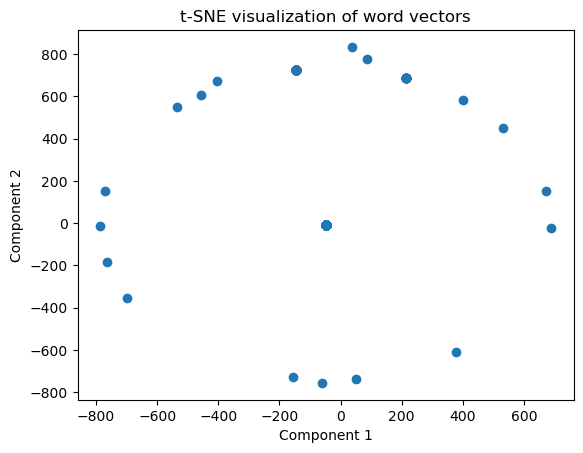

In [59]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# แปลงข้อมูลเป็น numpy array
X_train_vectors_array = np.array(X_train_vectors)

# ตรวจสอบขนาดของข้อมูล
print(f"Data shape: {X_train_vectors_array.shape}")

# ลดมิติเป็น 2 มิติสำหรับการแสดงผล
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_vectors_array)

# แสดงผลลัพธ์
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title("t-SNE visualization of word vectors")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [54]:
from sklearn.linear_model import LogisticRegression

In [61]:
# ตรวจสอบขนาดของข้อมูล
print(len(X_train_vectors), len(y_train))

# ตรวจสอบการสร้างข้อมูล
# การเตรียมข้อมูลและการแบ่งข้อมูลควรให้ขนาดตรงกัน


7000 5600


In [56]:
clf = LogisticRegression()
clf.fit(X_train_vectors, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [7000, 5600]

In [ ]:
def get_sentence_vector(cleaned_word, reduced_vecs):
    # แปลงคำแต่ละคำในข้อความเป็นเวกเตอร์แล้วหาค่าเฉลี่ย
    vectors = [reduced_vecs.wv[word] for word in cleaned_word if word in reduced_vecs.wv]
    return np.mean(vectors, axis=0)

vec = cleanText.apply(lambda x: get_sentence_vector(x, reduced_vecs))